In [6]:
import numpy as np
from camera import Camera
from read_form_obj import read_from_obj
from render_triangle import rasterize_triangle_with_depth
from render_triangle import to_homogeneous, normalize_z, scale_points, show_image

In [7]:
vertices, faces = read_from_obj("../bench/model.obj")

In [8]:
camera_position = np.array([1, 2, -3])
at = np.array([0, 0, 0])
up = np.array([0, 1, 0])
fov = 90
z_near = 0.1
z_far = 100

In [9]:
camera = Camera(camera_position, at, up, fov, z_near, z_far)
vertices = vertices - np.mean(vertices)
cube_homogeneous = to_homogeneous(vertices)
projected_cube = camera(cube_homogeneous)
normalize_z(projected_cube)
scale_points(projected_cube)

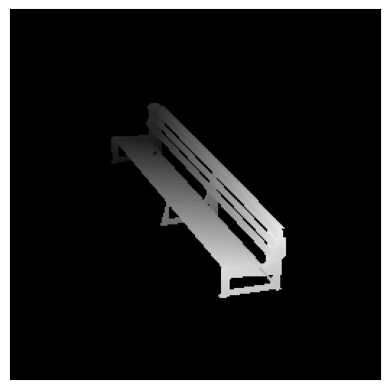

In [10]:
canvas = np.zeros(shape=(256, 256, 3))
z_buffer = np.zeros(shape=(256, 256, 3))
z_buffer.fill(-float("inf"))

for face in faces:
    to_rasterizer = projected_cube[face]
    canvas, z_buffer = rasterize_triangle_with_depth(to_rasterizer, canvas=canvas, z_buffer=z_buffer)
show_image(canvas)